# Advanced Data Analysis - assignment 1

This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on weather information, more specifically information about temperature and precipitation.

The data in the dataset provided was obtained from NOAA ([https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html)).



### DEADLINE: 28-September-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. 

Students have **three grace days** that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [321]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt
plt.style.use('seaborn')


## Datasets

For solving the questions posed, you have the following datasets available.

### Weather dara

File ```assignment1/weather.csv``` contains the information about the weather in a set of weather stations located around the world. The dataset includes the following columns:
* date, a date in the format year-month-day (e.g. 1995-01-31):
* id, the id of the weather station;
* tmax, the maximum temperature registered in the given day and weather station (in tenth of degrees);
* tmin, the minimum temperature registered in the given day and weather station (in tenth of degrees);
* prcp, the percipitation registered in the given day and weather station;

The dataset does not includes data for all stations for all the dates - while for some stations, data starts in 1950, for others stations it is available only is shorter intervals; even for stations for which data is available from 1950, the data is missing for some days.

File ```assignment1/stations.csv``` contains information about weather stations. The dataset includes the following columns:
* id, the id of the weather stations;
* lat, the latitude of the stations;
* lon, the longitude of the stations;
* alt, the altitude of the stations;
* name, with the name of the weather station;
* cid, with the code id for the country;


File ```assignment1/regions.csv``` contains information about regions. The dataset includes the following columns:
* region, with the region in which the country is located;
* country, the country name;
* cid, with the code id for the country.


The following given code loads the datasets.


In [322]:
dataFileName = os.path.join( "data-a1", "weather.csv")

dataDF = pd.read_csv(dataFileName)
dataDF["date"] = pd.to_datetime(dataDF["date"], format="%Y-%m-%d")

print(dataDF.head(5))

            id       date  tmax  tmin  prcp
0  ASN00066062 1950-01-01   199   176    61
1  ASN00066062 1950-01-02   275   171   224
2  ASN00066062 1950-01-03   233   166    20
3  ASN00066062 1950-01-04   248   178     0
4  ASN00066062 1950-01-05   271   182     0


In [323]:
stationsFileName = os.path.join( "data-a1", "stations.csv")

stationsDF = pd.read_csv(stationsFileName)

print(stationsDF.head(5))

            id      lat      lon     alt                   name cid
0  ACW00011604  17.1167 -61.7833    10.1  ST JOHNS COOLIDGE FLD  AC
1  ACW00011647  17.1333 -61.7833    19.2               ST JOHNS  AC
2  AE000041196  25.3330  55.5170    34.0    SHARJAH INTER. AIRP  AE
3  AF000040930  35.3170  69.0170  3366.0           NORTH-SALANG  AF
4  AG000060390  36.7167   3.2500    24.0     ALGER-DAR EL BEIDA  AG


In [324]:
regionsFileName = os.path.join( "data-a1", "regions.csv")

regionsDF = pd.read_csv(regionsFileName)

print(regionsDF.head(5))

          region               country cid
0  North America         United States  US
1    Middle East  United Arab Emirates  AE
2         Africa              Ethiopia  ET
3         Africa               Algeria  AG
4           Asia            Kazakhstan  KZ


## Question 1 (6 points)

In this question, we start by exploring the data available with simple queries. In you answers, you can use the data computed in the previous one, when usefull.


### **1.a)** What are the three highest and lowest temperatures and the maximum precipitation registered, when and in which station were they registered?


In [325]:
# Let's add a column with the stations name to have more information
dataDF = dataDF.join(stationsDF[["id","name"]].set_index("id"), on="id")

In [326]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

highest_temps = dataDF[["tmax", "id", "date"]].nlargest(3, "tmax").reset_index(drop=True)

lowest_temps = dataDF[["tmin", "id", "date"]].nsmallest(3, "tmin").reset_index(drop=True)

highest_prcp = dataDF[["prcp", "id", "date"]].nlargest(1, "prcp").reset_index(drop=True)

print("The 3 highest temperatures registered are:")
print(highest_temps)
print("\n")
print("The 3 lowest temperatures registered are:")
print(lowest_temps)
print("\n")
print("The maximum precipitation registered is:")
print(highest_prcp)

The 3 highest temperatures registered are:
   tmax           id       date
0   458  ASN00066062 2013-01-18
1   442  ASN00066062 2006-01-01
2   434  ASN00066062 2018-01-07


The 3 lowest temperatures registered are:
   tmin           id       date
0  -245  GM000003342 1969-12-21
1  -230  GM000003342 1956-02-09
2  -219  GM000003342 1956-02-01


The maximum precipitation registered is:
   prcp           id       date
0  3276  ASN00066062 1986-08-06


### 1.b) Print the information for the top-3 days with the highest and lowest temperature and the maximum precipitation in station PO000008535 (Lisbon).


In [327]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
lisbon_temps = dataDF[dataDF["id"] == "PO000008535"]

highest_temps_lisbon = lisbon_temps[["tmax", "id", "date"]].nlargest(3, "tmax").reset_index(drop=True)
print("The 3 highest temperatures registered in Lisbon are:")
print(highest_temps_lisbon)
print("\n")

lowest_temps_lisbon = lisbon_temps[["tmin", "id", "date"]].nsmallest(3, "tmin").reset_index(drop=True)
print("The 3 lowest temperatures registered in Lisbon are:")
print(lowest_temps_lisbon)
print("\n")

highest_prcp_lisbon = lisbon_temps[["prcp", "id", "date"]].nlargest(1, "prcp").reset_index(drop=True)
print("The maximum precipitation registered in Lisbon is:")
print(highest_prcp_lisbon)

The 3 highest temperatures registered in Lisbon are:
   tmax           id       date
0   420  PO000008535 2018-08-04
1   415  PO000008535 1981-06-13
2   406  PO000008535 1991-07-17


The 3 lowest temperatures registered in Lisbon are:
   tmin           id       date
0    -9  PO000008535 1954-02-05
1    -8  PO000008535 1956-02-11
2    -8  PO000008535 1956-02-12


The maximum precipitation registered in Lisbon is:
   prcp           id       date
0  1024  PO000008535 2008-02-18


### 1.c) For Lisbon, how many days had maximum temperature higher or equal to 30ºC, per year, since 1970?

**NOTE:** in a DataFrame ```df```, with column ```d``` with a datetime, it is possible to access the year with ```df["d"].dt.year```.


In [328]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
lisbon_temp_over_30 = lisbon_temps[lisbon_temps["tmax"] >= 300]
lisbon_temp_over_30_since_1970 = lisbon_temp_over_30[lisbon_temp_over_30["date"].dt.year >= 1970]

days_per_year = pd.DataFrame({"year": lisbon_temp_over_30_since_1970["date"].dt.year.drop_duplicates(), "days": 0}).reset_index(drop=True)

for i in range(len(days_per_year)):
    count_days = len(lisbon_temp_over_30_since_1970[lisbon_temp_over_30_since_1970["date"].dt.year == days_per_year.iat[i,0]])
    days_per_year["days"][i] = count_days
    
print(days_per_year)

    year  days
0   1970    26
1   1971    17
2   1972     8
3   1973    22
4   1974    33
5   1975    18
6   1976    25
7   1977    16
8   1978    28
9   1979    20
10  1980    28
11  1981    31
12  1982    20
13  1983    20
14  1984    26
15  1985    26
16  1986    21
17  1987    38
18  1988    22
19  1989    36
20  1990    26
21  1991    43
22  1992    28
23  1993    23
24  1994    15
25  1995    24
26  1996    27
27  1997    21
28  1998    27
29  1999    22
30  2001    19
31  2002    15
32  2003    33
33  2004    28
34  2005    34
35  2006    41
36  2007    22
37  2008    17
38  2009    33
39  2010    41
40  2011    22
41  2012    27
42  2013    37
43  2014    13
44  2015    30
45  2016    46
46  2017    40
47  2018    33
48  2019    28
49  2021     1
50  2022    31


### 1.d) Print information about the top-10 days with the largest temperature difference?


In [329]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
dataDF_with_dif = dataDF.copy()
dataDF_with_dif["temp_dif"] = dataDF_with_dif["tmax"] - dataDF_with_dif["tmin"]
dataDF_with_dif.nlargest(10, "temp_dif").reset_index(drop=True)

,id,date,tmax,tmin,prcp,name,temp_dif
0,ASN00066062,2013-01-18,458,217,0,SYDNEY (OBSERVATORY HILL),241
1,ASN00066062,1957-11-24,384,166,0,SYDNEY (OBSERVATORY HILL),218
2,ASN00066062,1957-12-20,422,206,8,SYDNEY (OBSERVATORY HILL),216
3,GM000003342,2003-05-05,307,91,0,POTSDAM,216
4,ASN00066062,2013-01-08,423,209,0,SYDNEY (OBSERVATORY HILL),214
5,GM000003342,1995-04-22,269,55,0,POTSDAM,214
6,PO000008535,1992-09-14,360,147,0,LISBOA GEOFISICA,213
7,ASN00066062,1951-11-03,350,138,0,SYDNEY (OBSERVATORY HILL),212
8,ASN00066062,1987-11-13,326,115,68,SYDNEY (OBSERVATORY HILL),211
9,GM000003342,2020-04-12,245,34,27,POTSDAM,211


### 1.e) Find maximum values for all weather stations

For all weather stations, print their respective highest temperature, lowest temperature and maximum precipitation since 1970.


In [330]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
info_after_1970 = dataDF[dataDF["date"].dt.year >= 1970]

weather_stations = pd.DataFrame({"station": info_after_1970["id"].drop_duplicates()}).reset_index(drop=True)
stations_since_1970 = pd.DataFrame(info_after_1970["id"].drop_duplicates()).reset_index(drop=True)
stations_since_1970 = stations_since_1970.join(stationsDF[["id","name"]].set_index("id"), on="id")
stations_since_1970["tmax"] = 0
stations_since_1970["tmin"] = 0
stations_since_1970["max_prcp"] = 0

for i in range(len(stations_since_1970)):
    # tmax
    stations_since_1970.iat[i, 2] = info_after_1970[info_after_1970["id"] == stations_since_1970.iat[i,0]].nlargest(1, "tmax").reset_index(drop=True).loc[0, "tmax"]
    
    # tmin
    stations_since_1970.iat[i, 3] = info_after_1970[info_after_1970["id"] == stations_since_1970.iat[i,0]].nsmallest(1, "tmin").reset_index(drop=True).loc[0, "tmin"]
    
    # max_prcp
    stations_since_1970.iat[i, 4] = info_after_1970[info_after_1970["id"] == stations_since_1970.iat[i,0]].nlargest(1, "prcp").reset_index(drop=True).loc[0, "prcp"]
    
stations_since_1970

,id,name,tmax,tmin,max_prcp
0,ASN00066062,SYDNEY (OBSERVATORY HILL),458,27,3276
1,GM000003342,POTSDAM,386,-208,1048
2,PO000008535,LISBOA GEOFISICA,420,4,1024


## Question 2 (5 points)

This second question focus on processing the information on a time series for plotting it.


### 2.a) Display the information about temperatures and precipitation for a single station of your choice from 2018 to 2019.

Plot the information about temperatures and percipitation in some selected station from 2018 to 2019. In your answer consider that it would be useful to have access not only to the raw data but also to observe the trend of temperature variability over the year, without being too impacted by the natural day-to-day variability.

In the rationale of your solution, discuss the parameters used to smooth the lines.


,id,date,tmax,tmin,prcp,name,tmax_mean,tmin_mean
0,PO000008535,2018-01-01,178,101,0,LISBOA GEOFISICA,NaN,NaN
1,PO000008535,2018-01-02,168,104,0,LISBOA GEOFISICA,NaN,NaN
2,PO000008535,2018-01-03,174,112,0,LISBOA GEOFISICA,NaN,NaN
3,PO000008535,2018-01-04,167,137,10,LISBOA GEOFISICA,NaN,NaN
4,PO000008535,2018-01-05,152,134,165,LISBOA GEOFISICA,NaN,NaN
...,...,...,...,...,...,...,...,...
725,PO000008535,2019-12-27,160,112,0,LISBOA GEOFISICA,NaN,NaN
726,PO000008535,2019-12-28,168,112,0,LISBOA GEOFISICA,NaN,NaN
727,PO000008535,2019-12-29,198,99,0,LISBOA GEOFISICA,NaN,NaN
728,PO000008535,2019-12-30,164,89,0,LISBOA GEOFISICA,NaN,NaN


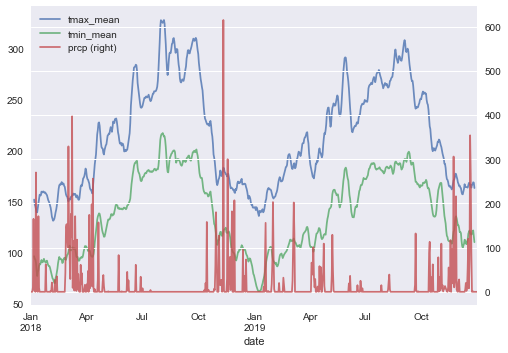

In [331]:
#Solve question here. Briefly justy you solution in the following markdown cell.
lisbon_temps_18_19 = lisbon_temps[lisbon_temps["date"].dt.year == 2018].merge(lisbon_temps[lisbon_temps["date"].dt.year == 2019], how='outer')

lisbon_temps_18_19["tmax_mean"] = lisbon_temps_18_19["tmax"].rolling(11, center=True).mean()
lisbon_temps_18_19["tmin_mean"] = lisbon_temps_18_19["tmin"].rolling(11, center=True).mean()

lisbon_temps_18_19.plot(x="date", y=["tmax_mean", "tmin_mean", "prcp"], secondary_y=["prcp"], alpha=0.8)
lisbon_temps_18_19

**Rationale:** In order to smooth the temperature lines, I used the rolling and mean atrributes. With k=11, using the centered moving average, we can analyze for each day the average of temperatures for that day, the previous 5 days and the following 5 days. The higher k is, the smoother are the temperature lines.

### 2.b) Display long-term trends.

In this question we want to verify the long term trends. In particular, we want to know whether the average temperature or difference between maximum and minimum temperature has been increasing over the years or the precipiation has been descreasing in the full period for which data is available, without being too much impacted by the natural variability over each year. 

NOTE: compute the average temperature in a day as the average between the maximum and minimum temperatures of that day.

Select 2 weather stations in different continents, compute the necessary data and plot it.

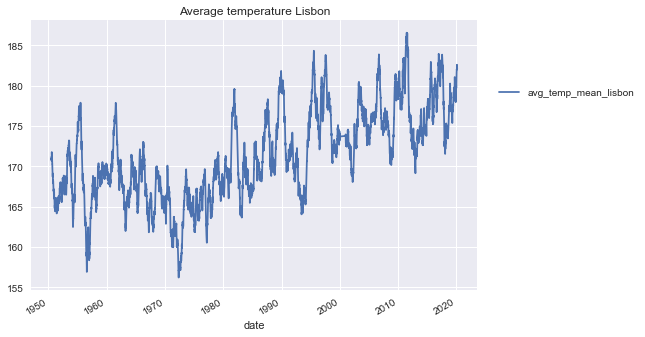

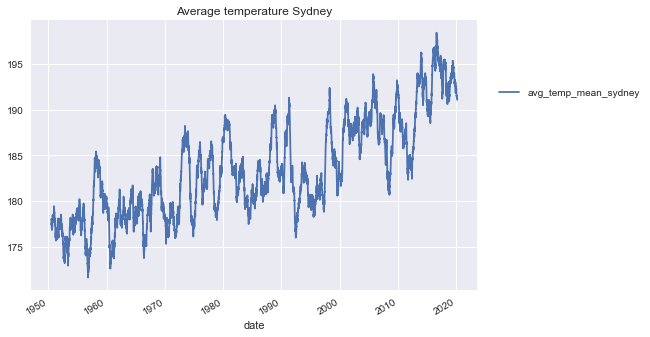

In [332]:
#Solve question here. Briefly justy you solution in the following markdown cell.

sydney_temps = dataDF[dataDF["id"] == "ASN00066062"]

sydney_avg_temps = sydney_temps.copy()
lisbon_avg_temps = lisbon_temps.copy()

sydney_avg_temps["avg_temp"] = (sydney_avg_temps["tmax"] + sydney_avg_temps["tmin"])/2
lisbon_avg_temps["avg_temp"] = (lisbon_avg_temps["tmax"] + lisbon_avg_temps["tmin"])/2
    
lisbon_avg_temps["avg_temp_mean_lisbon"] = lisbon_avg_temps["avg_temp"].rolling(361, center=True).mean()
sydney_avg_temps["avg_temp_mean_sydney"] = sydney_avg_temps["avg_temp"].rolling(361, center=True).mean()

lisbon_avg_temps.plot(x="date", y="avg_temp_mean_lisbon", title="Average temperature Lisbon").legend(loc=(1.04, 0.7))
sydney_avg_temps.plot(x="date", y="avg_temp_mean_sydney", title="Average temperature Sydney").legend(loc=(1.04, 0.7))

**Rationale:** I started by creating a copy of the Lisbon and Sydney dataframes, to prevent an error of setting a value to a copy of a slice appearing. Then, I added a new column to the Lisbon and Sydney dataframes with the average temperature for each day. In order to smooth the average temperature lines, I used again the centered moving average. Therefore, we can analyze for each day the average of temperatures for that day, the previous 155 days and the following 155 days. The higher k is, the smoother are the average temperature lines.

## Question 3 (4 points)

This third question focus on understanding the relations between weather elements.


### 3.a) Is there any relation between different weather elements for a given city?

For a given weather station, let's start by investigating if there is a relation between the different weather elements.



In [333]:
#Solve question here. Briefly justy you solution in the following markdown cell.
print("The correlations between the weather elements for Lisbon are:")

lisbon_tmin_prcp = lisbon_temps[["tmin", "prcp"]]
print(lisbon_tmin_prcp.corr(method='pearson'))
print("\n")

lisbon_tmax_prcp = lisbon_temps[["tmax", "prcp"]]
print(lisbon_tmax_prcp.corr(method='pearson'))
print("\n")

lisbon_tmax_tmin = lisbon_temps[["tmax", "tmin"]]
print(lisbon_tmax_tmin.corr(method='pearson'))

The correlations between the weather elements for Lisbon are:
          tmin      prcp
tmin  1.000000 -0.089417
prcp -0.089417  1.000000


          tmax      prcp
tmax  1.000000 -0.209488
prcp -0.209488  1.000000


          tmax      tmin
tmax  1.000000  0.802483
tmin  0.802483  1.000000


**Present an interpretation of the results here:** 

        - Negative correlation between tmin/prcp and tmax/prcp, which means that when one element increases its value, the other one will decrease its value. This correlation is stronger between tmax/prcp than tmin/prcp.
        - Positive correlation between tmax/tmin, which means that when one element increases its value, the other one will also increase its value.

### 3.b) Is there a relation between weather elements in different cities?

Select three cities, two of which you believe have similar weather and other with different weather and use the studied methods to confirm you intuitions (or not) for the different weather elements.

In the Markdown cell below your code, comment the results obtained.



In [334]:
DF_corr = dataDF[(dataDF["id"] == "GM000003342") | (dataDF["id"] == "PO000008535") | (dataDF["id"] == "ASN00066062")]

DF_corr[["date", "name", "tmax", "tmin", "prcp"]].groupby(["name","date"]).mean().unstack("name").corr()

tmax            \
name                           LISBOA GEOFISICA   POTSDAM   
     name                                                   
tmax LISBOA GEOFISICA                  1.000000  0.716515   
     POTSDAM                           0.716515  1.000000   
     SYDNEY (OBSERVATORY HILL)        -0.565191 -0.597506   
tmin LISBOA GEOFISICA                  0.802483  0.668288   
     POTSDAM                           0.720997  0.916250   
     SYDNEY (OBSERVATORY HILL)        -0.703477 -0.733135   
prcp LISBOA GEOFISICA                 -0.209488 -0.163904   
     POTSDAM                           0.066646  0.025109   
     SYDNEY (OBSERVATORY HILL)        -0.030900 -0.015168   

                                                                     tmin  \
name                           SYDNEY (OBSERVATORY HILL) LISBOA GEOFISICA   
     name                                                                   
tmax LISBOA GEOFISICA                          -0.565191         0.802483   
     POTSDAM                                   -0.597506         0.668288   
     SYDNEY (OBSERVATORY HILL)                  1.000000        -0.513313   
tmin LISBOA GEOFISICA                          -0.513313         1.000000   
     POTSDAM                                   -0.586958         0.671242   
     SYDNEY (OBSERVATORY HILL)                  0.770971        -0.645762   
prcp LISBOA GEOFISICA                           0.122768        -0.089417   
     POTSDAM                                   -0.049689         0.039894   
     SYDNEY (OBSERVATORY HILL)                 -0.113816        -0.036116   

                                                                    \
name                             POTSDAM SYDNEY (OBSERVATORY HILL)   
     name                                                            
tmax LISBOA GEOFISICA           0.720997                 -0.703477   
     POTSDAM                    0.916250                 -0.733135   
     SYDNEY (OBSERVATORY HILL) -0.586958                  0.770971   
tmin LISBOA GEOFISICA           0.671242                 -0.645762   
     POTSDAM                    1.000000                 -0.721475   
     SYDNEY (OBSERVATORY HILL) -0.721475                  1.000000   
prcp LISBOA GEOFISICA          -0.180354                  0.147669   
     POTSDAM                    0.107010                 -0.053662   
     SYDNEY (OBSERVATORY HILL) -0.024134                  0.036998   

                                           prcp            \
name                           LISBOA GEOFISICA   POTSDAM   
     name                                                   
tmax LISBOA GEOFISICA                 -0.209488  0.066646   
     POTSDAM                          -0.163904  0.025109   
     SYDNEY (OBSERVATORY HILL)         0.122768 -0.049689   
tmin LISBOA GEOFISICA                 -0.089417  0.039894   
     POTSDAM                          -0.180354  0.107010   
     SYDNEY (OBSERVATORY HILL)         0.147669 -0.053662   
prcp LISBOA GEOFISICA                  1.000000 -0.049896   
     POTSDAM                          -0.049896  1.000000   
     SYDNEY (OBSERVATORY HILL)         0.003465  0.000242   

                                                          
name                           SYDNEY (OBSERVATORY HILL)  
     name                                                 
tmax LISBOA GEOFISICA                          -0.030900  
     POTSDAM                                   -0.015168  
     SYDNEY (OBSERVATORY HILL)                 -0.113816  
tmin LISBOA GEOFISICA                          -0.036116  
     POTSDAM                                   -0.024134  
     SYDNEY (OBSERVATORY HILL)                  0.036998  
prcp LISBOA GEOFISICA                           0.003465  
     POTSDAM                                    0.000242  
     SYDNEY (OBSERVATORY HILL)                  1.000000

**Rationale and comments:** 
In this analysis, I am comparing the correlation modules (|corr|) because I am assuming that negative values  mean that the cities are on an opposite hemisphere. When a weather factor increases its value, the value in another city decreases. This does not mean that the weather is not similar, but that it behaves similarly in an opposite way.

For the maximum temperature, we conclude that the cities with the highest correlation module / more similar weather are Lisbon and Postdam (0.716515) and the cities with the lowest correlation module / least similar weather are Lisbon and Postdam (|-0.565191| = 0.565191).

For the minimum temperature, we conclude that the cities with the highest correlation module / more similar weather are Sydney and Postdam (|-0.721475| = 0.721475) and the cities with the lowest correlation module / least similar weather are Lisbon and Sydney (|-0.645762| = 0.645762).

For the precipitation, we conclude that the cities with the highest correlation module / more similar weather are Lisbon and Postdam (|-0.049896| = 0.049896) and the cities with the lowest correlation module / least similar weather are Lisbon and Sydney (0.000242).

In [335]:
# Alternative method that takes longer to run (aprox. 30 seconds)
"""postdam_temps = dataDF[dataDF["id"] == "GM000003342"]

# Dataframe with values (from Postdam) to correlate
val_to_corr = postdam_temps[["date", "tmax", "tmin", "prcp"]].merge(lisbon_temps[["date"]],how="outer")#.merge(sydney_temps[["date"]],how="inner")

val_to_corr = val_to_corr.rename(columns={"tmax":"tmax_postdam", "tmin":"tmin_postdam", "prcp":"prcp_postdam"})

# Insert columns with NaN value
val_to_corr["tmax_lisbon"] = float("nan")
val_to_corr["tmin_lisbon"] = float("nan")
val_to_corr["prcp_lisbon"] = float("nan")

val_to_corr["tmax_sydney"] = float("nan")
val_to_corr["tmin_sydney"] = float("nan")
val_to_corr["prcp_sydney"] = float("nan")

# Get weather values for Lisbon and Sydney
for i in range(len(val_to_corr)):
    current_date_lisbon_DF = lisbon_temps[lisbon_temps["date"] == val_to_corr.iat[i, 0]]
    current_date_sydney_DF = sydney_temps[sydney_temps["date"] == val_to_corr.iat[i, 0]]
    if not current_date_lisbon_DF.empty:
        val_to_corr.iat[i, 4] = current_date_lisbon_DF.iat[0, 2]
        val_to_corr.iat[i, 5] = current_date_lisbon_DF.iat[0, 3]
        val_to_corr.iat[i, 6] = current_date_lisbon_DF.iat[0, 4]
    if not current_date_sydney_DF.empty:
        val_to_corr.iat[i, 7] = current_date_sydney_DF.iat[0, 2]
        val_to_corr.iat[i, 8] = current_date_sydney_DF.iat[0, 3]
        val_to_corr.iat[i, 9] = current_date_sydney_DF.iat[0, 4]

val_to_corr.corr(method="pearson")"""

'postdam_temps = dataDF[dataDF["id"] == "GM000003342"]\n\n# Dataframe with values (from Postdam) to correlate\nval_to_corr = postdam_temps[["date", "tmax", "tmin", "prcp"]].merge(lisbon_temps[["date"]],how="outer")#.merge(sydney_temps[["date"]],how="inner")\n\nval_to_corr = val_to_corr.rename(columns={"tmax":"tmax_postdam", "tmin":"tmin_postdam", "prcp":"prcp_postdam"})\n\n#print(val_to_corr)\n\n# Insert columns with NaN value\nval_to_corr["tmax_lisbon"] = float("nan")\nval_to_corr["tmin_lisbon"] = float("nan")\nval_to_corr["prcp_lisbon"] = float("nan")\n\nval_to_corr["tmax_sydney"] = float("nan")\nval_to_corr["tmin_sydney"] = float("nan")\nval_to_corr["prcp_sydney"] = float("nan")\n\n# Get weather values for Lisbon and Sydney\ni=0\nfor i in range(len(val_to_corr)):\n    current_date_lisbon_DF = lisbon_temps[lisbon_temps["date"] == val_to_corr.iat[i, 0]]\n    current_date_sydney_DF = sydney_temps[sydney_temps["date"] == val_to_corr.iat[i, 0]]\n    if not current_date_lisbon_DF.empty:\n

## Question 4 (5 points)

This fourth question focus on doing analysis at a country or region-scale.
.

In [336]:
# Read file and add name, cid and region columns
completeWeatherFileName = os.path.join("weather2.csv")

compWeatherDF = pd.read_csv(completeWeatherFileName)

compWeatherDF = compWeatherDF.join(stationsDF[["id","name", "cid"]].set_index("id"), on="id")
compWeatherDF = compWeatherDF.join(regionsDF[["cid","region"]].set_index("cid"), on="cid")
compWeatherDF = compWeatherDF.join(stationsDF[["id","lat"]].set_index("id"), on="id")

print(compWeatherDF)

                  id        date  tmax  tmin  prcp                name cid  \
0        AG000060390  1950-01-01   162    80    91  ALGER-DAR EL BEIDA  AG   
1        AG000060390  1950-01-02   129    74   153  ALGER-DAR EL BEIDA  AG   
2        AG000060390  1950-01-03   138    70     0  ALGER-DAR EL BEIDA  AG   
3        AG000060390  1950-01-04   163    68     0  ALGER-DAR EL BEIDA  AG   
4        AG000060390  1950-01-05   172    57     0  ALGER-DAR EL BEIDA  AG   
...              ...         ...   ...   ...   ...                 ...  ..   
2350888  USW00092811  2022-06-26   256   222     0         MIAMI BEACH  US   
2350889  USW00092811  2022-06-27   267   239     0         MIAMI BEACH  US   
2350890  USW00092811  2022-06-28   272   239     0         MIAMI BEACH  US   
2350891  USW00092811  2022-06-29   294   256     0         MIAMI BEACH  US   
2350892  USW00092811  2022-06-30   311   267     0         MIAMI BEACH  US   

                region      lat  
0               Africa  36.71

### 4.a) Display the higest and lowest temperature and highest percipitation in each region


In [337]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
regions_records = pd.DataFrame({"region": compWeatherDF["region"].drop_duplicates()}).reset_index(drop=True)

regions_records["tmax"] = 0
regions_records["tmin"] = 0
regions_records["max_prcp"] = 0

for i in range(len(regions_records)):
    # tmax
    regions_records.iat[i, 1] = compWeatherDF[compWeatherDF["region"] == regions_records.iat[i,0]].nlargest(1, "tmax").reset_index(drop=True).loc[0, "tmax"]
    
    # tmin
    regions_records.iat[i, 2] = compWeatherDF[compWeatherDF["region"] == regions_records.iat[i,0]].nsmallest(1, "tmin").reset_index(drop=True).loc[0, "tmin"]
    
    # max_prcp
    regions_records.iat[i, 3] = compWeatherDF[compWeatherDF["region"] == regions_records.iat[i,0]].nlargest(1, "prcp").reset_index(drop=True).loc[0, "prcp"]
    
regions_records

,region,tmax,tmin,max_prcp
0,Africa,498,-85,5001
1,South/Central America & Carribean,456,-85,4900
2,Australia/South Pacific,467,-67,3276
3,Europe,442,-381,2000
4,North America,433,-512,2794
5,Asia,490,-440,4549
6,Middle East,513,-139,7780


### 4.2 Compare the evolution of average temperature in different regions 

Compute and plot the information of the average temperature in different regions (using the regions defined in the given datasets).

**Suggestion:** In your reply, you need to consder the granularity of data aggregation to help displaying data.

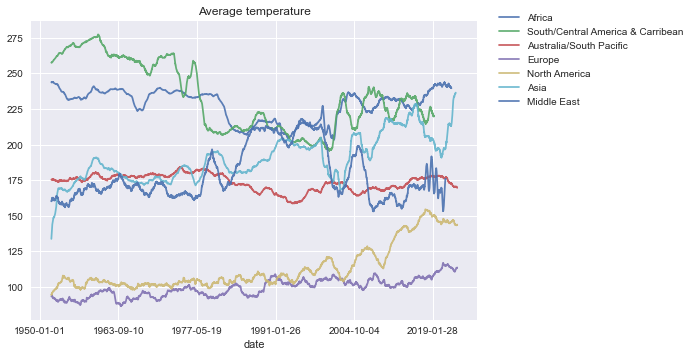

,date,tmax,tmin,prcp,lat,avg_temp,avg_temp_rolling
0,1950-01-01,108.333333,24.00,116.666667,35.233367,66.166667,NaN
1,1950-01-02,74.750000,9.25,37.500000,35.862525,42.000000,NaN
2,1950-01-03,122.500000,74.00,46.500000,32.366700,98.250000,NaN
3,1950-01-04,124.000000,51.50,123.000000,35.862525,87.750000,NaN
4,1950-01-05,96.500000,28.50,103.500000,35.862525,62.500000,NaN
...,...,...,...,...,...,...,...
25814,2022-09-13,270.000000,181.00,0.000000,32.966700,225.500000,175.812443
25815,2022-09-15,268.000000,160.00,0.000000,32.966700,214.000000,175.735731
25816,2022-09-16,298.000000,158.00,0.000000,32.966700,228.000000,175.774087
25817,2022-09-17,297.000000,202.00,0.000000,32.966700,249.500000,175.857648


In [338]:
#Solve question here. Briefly justy you solution in the following markdown cell.

fig, axis = plt.subplots()
for i in range(len(regions_records)):
    region_temps = compWeatherDF[compWeatherDF["region"] == regions_records.iat[i,0]]
    region_temps = region_temps.copy()
    region_temps["avg_temp"] = (region_temps["tmax"] + region_temps["tmin"]) / 2
    region_temps = region_temps.groupby("date", as_index=False).mean()
    region_temps["avg_temp_rolling"] = region_temps["avg_temp"].rolling(730, center=False).mean()
    region_temps.plot(ax=axis, x="date", y="avg_temp_rolling", alpha=0.9, title="Average temperature", label=regions_records.iat[i,0]).legend(loc=(1.04, 0.7))

plt.show()
region_temps

**Rationale:** 

For the calculation of the mean temperature moving average, I am using k=730, which is 2 full years in days. While doing this, we are reducing the granularity of the dataframe. This reduces the level of detail provided by the visualization, but also helps a lot of turning the graph clearer, with smoother lines to better visualize the data.

### 4.3 There are regions and regions...

The defined regions span a wide range of latitudes, that include areas with quite different weather conditions. For studying the evolution of weather in different regions, there could be other ways of grouping the weather stations.

Propose one such method and compute and plot the information with the given grouping.


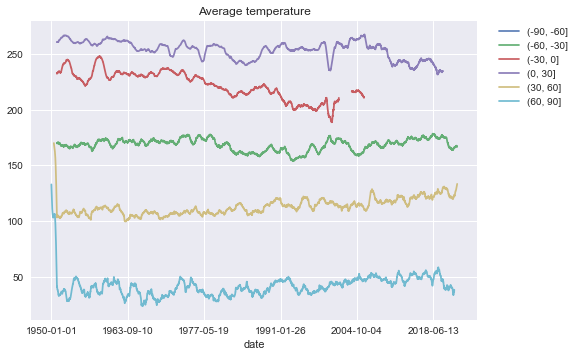

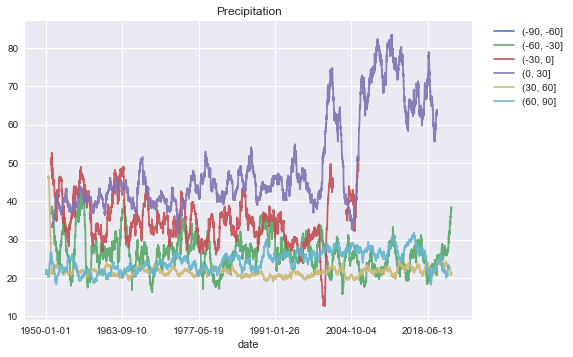

In [339]:
# Group latitudes in ranges of 30
bins = pd.IntervalIndex.from_tuples([(-90, -60), (-60, -30), (-30, 0), (0, 30), (30, 60), (60, 90)])
compWeatherDF["lat_interval"] = pd.cut(compWeatherDF["lat"], bins)
compWeatherDF_grouped = compWeatherDF.groupby(["lat_interval", "date"]).mean().reset_index().set_index(["date", "lat_interval"])
compWeatherDF_grouped["avg_temp"] = (compWeatherDF_grouped["tmax"] + compWeatherDF_grouped["tmin"]) / 2
compWeatherDF_grouped["avg_temp_rolling"] = compWeatherDF_grouped["avg_temp"].rolling(365, center=False).mean()
compWeatherDF_grouped["prcp_rolling"] = compWeatherDF_grouped["prcp"].rolling(365, center=False).mean()

compWeatherDF_grouped_Temp = compWeatherDF_grouped[["avg_temp_rolling"]].unstack()
compWeatherDF_grouped_Prcp = compWeatherDF_grouped[["prcp_rolling"]].unstack()

compWeatherDF_grouped_Temp.plot(y="avg_temp_rolling", alpha=0.9, title="Average temperature").legend(loc=(1.04, 0.7))
compWeatherDF_grouped_Prcp.plot(y="prcp_rolling", alpha=0.9, title="Precipitation").legend(loc=(1.04, 0.7))

#print(compWeatherDF_grouped_Temp)
#print(compWeatherDF_grouped_Prcp)

**Rationale:** 

Grouping the weather stations in classes of 30, we get groups of stations with a bit more similar weather. To this, I used the cut pandas function, which was really helpful to associate each station with a class of latitudes. We can observe that there are classes of latitudes with no data in some dates. For the class [-90, -60] there is no line, which suggests there is no station between these latitudes.